# Data Preparation

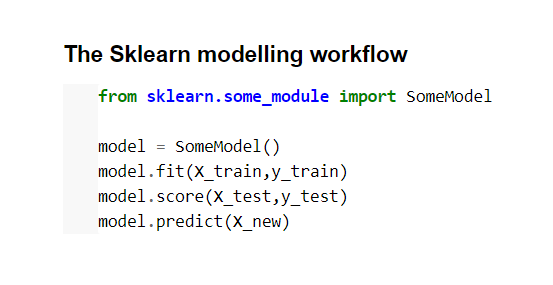

### The Holdout Method in Scikit-Learn

In [1]:
import pandas as pd

data = pd.read_csv('data/ML_Houses_dataset.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
data = data[['GrLivArea',
             'BedroomAbvGr',
             'KitchenAbvGr',
             'OverallCond',
             'Pesos',
             'Alley',
             'Street',
             'WallMat',
             'SalePrice']]

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,WallMat,SalePrice
0,1710,3,1,5,4170000.0,NaN,Pave,Concrete,208500
1,1262,3,1,8,3630000.0,NaN,Pave,Wood,181500
2,1786,3,1,5,4470000.0,NaN,Pave,Wood,223500
3,1717,3,1,5,2800000.0,NaN,Pave,Concrete,140000
4,2198,4,1,5,5000000.0,NaN,Pave,Concrete,250000


### Duplicates
Unwwanted duplicated observations can discredit the performance evaluation of a model

In [3]:
data[["GrLivArea","SalePrice"]].head(10)

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000
5,1362,143000
6,1694,307000
7,2090,200000
8,1774,129900
9,1077,118000


## 1 👥 Duplicates

❓ Duplicated observations can discredit the performance evaluation of a model. Why ❓

⚠️ Data Leakage

In order to evaluate a model's ability to generalize, the data in the test set should remain unseen by the algorithm during the training phase.

If there are duplicated rows present in both the training set and the test set, this can cause unreliable scores.

#### 💻 drop_duplicates

In [4]:
len(data) # Check number of rows before removing duplicates

1760

In [5]:
data.duplicated() # Check whether a row is a duplicated version of a previous row

0       False
1       False
2       False
3       False
4       False
        ...  
1755     True
1756     True
1757     True
1758     True
1759     True
Length: 1760, dtype: bool

In [6]:
data.duplicated().sum() # Compute the number of duplicated rows

303

In [7]:
data = data.drop_duplicates() # Remove duplicates
len(data)# Check new number of rows

1457

## 2 🔮 Missing Data

#### Common reasons for missing data

🧑🏻‍💻 Programming error

😕 Failure of measurement (e.g. a patient in a clinical study misses a scheduled visit)

🎲 Random events (e.g. meteorological data collection device runs out of power)

❌ Incorrect text entries

etc...

#### 💻 Detecting missing data

In [8]:
# Counting the number of NaN for each column
data.isnull().sum().sort_values(ascending=False)

WallMat         1452
Alley           1367
Pesos             10
GrLivArea          0
BedroomAbvGr       0
KitchenAbvGr       0
OverallCond        0
Street             0
SalePrice          0
dtype: int64

In [9]:
# Counting the percentage of NaN for each column
data.isnull().sum().sort_values(ascending=False)/len(data) #NaN percentage for each column

WallMat         0.996568
Alley           0.938229
Pesos           0.006863
GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
Street          0.000000
SalePrice       0.000000
dtype: float64

#### Handling the missing data

How you handle missing values will differ from field to field and dataset to dataset.

- What might have caused the missing values?
- Do the missing values represent a particular story or event?
- Can I replace them by another value?
- Can I afford to lose any data?

#### WallMat

In [10]:
# Percentage of missing values in WallMat
(data.WallMat.isnull().sum()/len(data))

0.9965682910089224

In [11]:
# 99% is way too high, let's drop this feature
data.drop(columns='WallMat', inplace=True) # Drop WallMat column 
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice
0,1710,3,1,5,4170000.0,NaN,Pave,208500
1,1262,3,1,8,3630000.0,NaN,Pave,181500
2,1786,3,1,5,4470000.0,NaN,Pave,223500
3,1717,3,1,5,2800000.0,NaN,Pave,140000
4,2198,4,1,5,5000000.0,NaN,Pave,250000


#### Alley

In [12]:
#Percentage of missing values in Alley
(data.Alley.isnull().sum()/len(data))*100

93.8229238160604

🚨Missing data does not necessarily mean a lack of information!

👉 Here, you have to be careful. A NaN simply means that the house doesn't have an Alley.

In [13]:
import numpy as np

data.Alley.replace(np.nan, "NoAlley", inplace=True) #Replace NaN by "NoAlley"
data.Alley.value_counts()#Check count of each category

NoAlley    1367
Grvl         50
Pave         40
Name: Alley, dtype: int64

#### Pesos

In [14]:
# Percentage of missing values in Pesos
(data.Pesos.isnull().sum()/len(data))

0.0068634179821551134

In [15]:
# Option 1: Drop rows where Pesos value is missing
data.dropna(subset=['Pesos']) 

# Option 2: Replace missing Pesos values with mean
data.Pesos.replace(np.nan, data.Pesos.mean()) 

0       4170000.0
1       3630000.0
2       4470000.0
3       2800000.0
4       5000000.0
          ...    
1455    3500000.0
1456    4200000.0
1457    5330000.0
1458    2842500.0
1459    2950000.0
Name: Pesos, Length: 1457, dtype: float64

### 💡Suggestions

More than 30% of missing values:<br>
🚮 Potentially drop the feature or the row<br>
Less than 30% of missing values:<br>
💡 Consider an imputer with a strategy that makes sense (cf. next slides)<br>

🚨 Keep in mind that imputing a missing value is an approximation. This can generate potential noise and/or bias for your models.

 ### 🖥 Sklearn's SimpleImputer<br>
With this tool called SimpleImputer, you can replace missing values with a strategy of your choice ( e.g. median, mean, mode, most frequent...)

In [16]:
from sklearn.impute import SimpleImputer

# Instantiate a SimpleImputer object with your strategy of choice
imputer = SimpleImputer(strategy="mean") 

In [17]:
# Call the "fit" method on the object
imputer.fit(data[['Pesos']]) 

SimpleImputer()

In [18]:
# Call the "transform" method on the object
data['Pesos'] = imputer.transform(data[['Pesos']]) 

In [19]:
# The mean is stored in the transformer's memory
imputer.statistics_ 

array([3608796.22667588])

### How did the SimpleImputer work?

`imputer.fit()`<br>
imputer computes the strategy for the feature(s) it is being fitted on<br>
stores the "strategic" value as an attribute<br>
<br>
`imputer.transform()`<br>
identifies missing values<br>
replaces missing values with the strategic value calculated in the fit step<br>
<br>
👨🏻‍🏫 In Scikit Learn, there are a couple of tools designed to help you prepare a dataset before feeding a Machine Learning model with the preprocessed data. They are called scikit-learn transformers

- `.fit()`: learns and stores constants as attributes of the transformer
- `.transform()`: uses these attributes to transform features of your choice from the original dataset

### Outliers

#### Common reasons for outliers
⌨️ Data entry errors<br>
📐 Measurement errors<br>
🧑🏻‍🔬 Data manipulation and preprocessing errors<br>
🆕 Novelties (not errors)

### Outliers affect:
🕵🏻‍♀️ Dataset distributions and patterns<br>
🕵🏻‍♀️ Central tendency metrics such as the mean of a feature<br>
🕵🏻‍♀️ Dispersion metrics such as standard deviation<br>
🤖 Performance of a Machine Learning model<br>

### Detecting Outliers - Boxplot

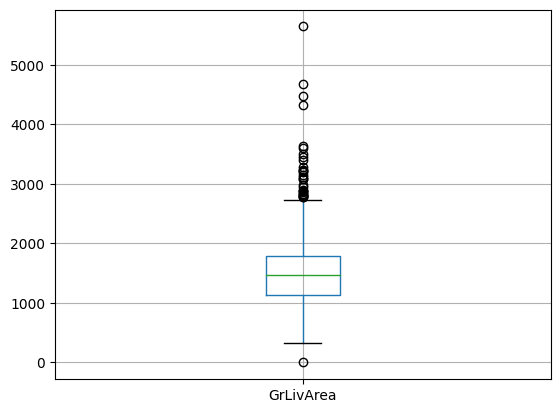

In [20]:
data[['GrLivArea']].boxplot();

#### Are all the outliers "real outliers"❓

In [21]:
data['GrLivArea'].min() 

-1

#### Handling Outliers
Is the outlier evidently false?<br>
Could it be a novelty?<br>
Could it be used as a feature?<br>
🚨Outliers can be an opinion. We must fully comprehend what an outlier is before removing it from the dataset.

#### Dropping Outliers
If data is evidently false: a house cannot have a living area of -1

In [22]:
data['GrLivArea']==-1

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: GrLivArea, Length: 1457, dtype: bool

In [23]:
# argmin() function returns the indices of the minimum value present in the input Index.
# If we are having more than one minimum value (i.e. minimum value is present more than once)
# then it returns the index of the first occurrence of the minimum value.
data['GrLivArea'].argmin()

10

In [24]:
# Saving the indexes corresponding to rows 
# without the absurd -1 value
# and without the mansion
# boolean_mask = (data['GrLivArea']>0) & (data['GrLivArea']<5000)

false_observation = data['GrLivArea'].argmin()

# Applying the boolean filteraing
data = data.drop(false_observation).reset_index(drop=True)

In [25]:
# Visualize boxplot again
data[['GrLivArea']].boxplot();

In [26]:
data[['GrLivArea']].boxplot();